In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -100.000, high = 100.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

651

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record coutn.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | hami
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | beyneu
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | quartucciu
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | henties bay
Processing Record 13 of Set 1 | talcahuano
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | san ramon
Processing Record 17 of Set 1 | birpur
Processing Record 18 of Set 1 | dekar
Processing Record 19 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of S

Processing Record 32 of Set 4 | krasnoselkup
Processing Record 33 of Set 4 | malakal
Processing Record 34 of Set 4 | carnarvon
Processing Record 35 of Set 4 | mayumba
Processing Record 36 of Set 4 | khoy
Processing Record 37 of Set 4 | paoua
Processing Record 38 of Set 4 | santa isabel do rio negro
Processing Record 39 of Set 4 | shwebo
Processing Record 40 of Set 4 | les cayes
Processing Record 41 of Set 4 | mananjary
Processing Record 42 of Set 4 | baykit
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | puerto ayora
Processing Record 45 of Set 4 | macapa
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | suslonger
Processing Record 48 of Set 4 | llanes
Processing Record 49 of Set 4 | saint-marc
Processing Record 50 of Set 4 | sabang
Processing Record 1 of Set 5 | havelock
Processing Record 2 of Set 5 | hurghada
Processing Record 3 of Set 5 | verkhniy rohachyk
Processing Record 4 of Set 5 | qostanay
Processing Record 5 of Set 5 | bantry
Pr

Processing Record 26 of Set 8 | barsovo
Processing Record 27 of Set 8 | padilla
Processing Record 28 of Set 8 | castle bruce
Processing Record 29 of Set 8 | guelengdeng
City not found. Skipping...
Processing Record 30 of Set 8 | graaff-reinet
Processing Record 31 of Set 8 | hendijan
City not found. Skipping...
Processing Record 32 of Set 8 | nadym
Processing Record 33 of Set 8 | viedma
Processing Record 34 of Set 8 | the valley
Processing Record 35 of Set 8 | atar
Processing Record 36 of Set 8 | takoradi
Processing Record 37 of Set 8 | pervomayskoye
Processing Record 38 of Set 8 | galveston
Processing Record 39 of Set 8 | himora
City not found. Skipping...
Processing Record 40 of Set 8 | ostersund
Processing Record 41 of Set 8 | stokmarknes
Processing Record 42 of Set 8 | yar-sale
Processing Record 43 of Set 8 | ustka
Processing Record 44 of Set 8 | kalabo
Processing Record 45 of Set 8 | filadelfia
Processing Record 46 of Set 8 | garh maharaja
Processing Record 47 of Set 8 | jalu
Proce

Processing Record 8 of Set 12 | krasne
Processing Record 9 of Set 12 | tromso
Processing Record 10 of Set 12 | atasu
Processing Record 11 of Set 12 | awjilah
Processing Record 12 of Set 12 | agadir
Processing Record 13 of Set 12 | atbasar
Processing Record 14 of Set 12 | nevel
Processing Record 15 of Set 12 | foggia
Processing Record 16 of Set 12 | nalut
Processing Record 17 of Set 12 | chippewa falls
Processing Record 18 of Set 12 | achutupo
Processing Record 19 of Set 12 | tres passos
Processing Record 20 of Set 12 | neustrelitz
Processing Record 21 of Set 12 | abu zabad
Processing Record 22 of Set 12 | maragogi
Processing Record 23 of Set 12 | ballitoville
Processing Record 24 of Set 12 | konya
Processing Record 25 of Set 12 | tres arroyos
Processing Record 26 of Set 12 | freeport
Processing Record 27 of Set 12 | corn island
Processing Record 28 of Set 12 | paradwip
City not found. Skipping...
Processing Record 29 of Set 12 | camocim
Processing Record 30 of Set 12 | claremore
Proces

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,64.80,82,75,23.02,PT,2021-11-21 16:22:05
1,Kruisfontein,-34.0033,24.7314,69.89,84,98,22.10,ZA,2021-11-21 16:22:05
2,Hami,42.8000,93.4500,26.44,47,0,3.18,CN,2021-11-21 16:22:05
3,Ushuaia,-54.8000,-68.3000,38.86,81,75,25.32,AR,2021-11-21 16:21:32
4,Beyneu,45.3167,55.2000,40.14,75,26,18.70,KZ,2021-11-21 16:22:06
5,Cape Town,-33.9258,18.4232,75.61,61,20,23.02,ZA,2021-11-21 16:20:28
6,Ilulissat,69.2167,-51.1000,24.82,68,75,6.91,GL,2021-11-21 16:22:06
7,Quartucciu,39.2519,9.1794,55.99,83,20,1.01,IT,2021-11-21 16:22:06
8,Thompson,55.7435,-97.8558,3.36,72,20,18.41,CA,2021-11-21 16:22:07
9,Port Elizabeth,-33.9180,25.5701,72.10,83,75,20.71,ZA,2021-11-21 16:22:07


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-11-21 16:22:05,38.5167,-28.7000,64.80,82,75,23.02
1,Kruisfontein,ZA,2021-11-21 16:22:05,-34.0033,24.7314,69.89,84,98,22.10
2,Hami,CN,2021-11-21 16:22:05,42.8000,93.4500,26.44,47,0,3.18
3,Ushuaia,AR,2021-11-21 16:21:32,-54.8000,-68.3000,38.86,81,75,25.32
4,Beyneu,KZ,2021-11-21 16:22:06,45.3167,55.2000,40.14,75,26,18.70
5,Cape Town,ZA,2021-11-21 16:20:28,-33.9258,18.4232,75.61,61,20,23.02
6,Ilulissat,GL,2021-11-21 16:22:06,69.2167,-51.1000,24.82,68,75,6.91
7,Quartucciu,IT,2021-11-21 16:22:06,39.2519,9.1794,55.99,83,20,1.01
8,Thompson,CA,2021-11-21 16:22:07,55.7435,-97.8558,3.36,72,20,18.41
9,Port Elizabeth,ZA,2021-11-21 16:22:07,-33.9180,25.5701,72.10,83,75,20.71


In [9]:
# Create the output file (CSV)
output_data_file = "Weather_Data/cities.csv"
# Export the City_Data_ into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

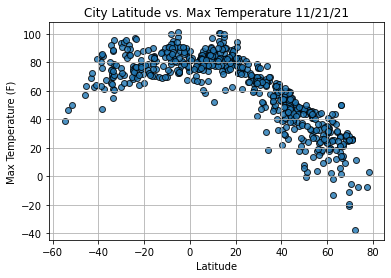

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_Data/Fig1.png")

# Show plot.
plt.show()

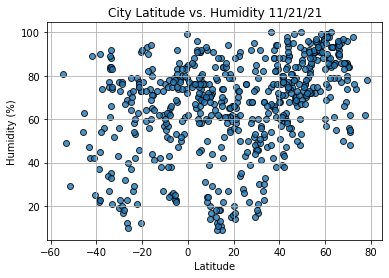

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig2.png")

# Show plot.
plt.show()

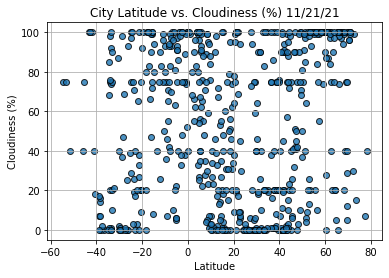

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig3.png")

# Show plot.
plt.show()

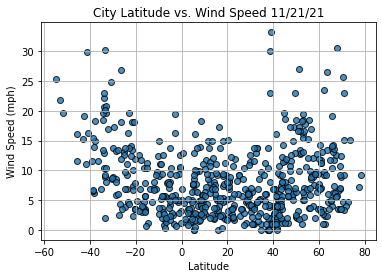

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig4.png")

# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [16]:
index13 = city_data_df.loc[13]
index13

City                         Chuy
Country                        UY
Date          2021-11-21 16:22:08
Lat                      -33.6971
Lng                      -53.4616
Max Temp                     87.8
Humidity                       35
Cloudiness                      0
Wind Speed                  10.33
Name: 13, dtype: object

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-11-21 16:22:05,38.5167,-28.7000,64.80,82,75,23.02
2,Hami,CN,2021-11-21 16:22:05,42.8000,93.4500,26.44,47,0,3.18
4,Beyneu,KZ,2021-11-21 16:22:06,45.3167,55.2000,40.14,75,26,18.70
6,Ilulissat,GL,2021-11-21 16:22:06,69.2167,-51.1000,24.82,68,75,6.91
7,Quartucciu,IT,2021-11-21 16:22:06,39.2519,9.1794,55.99,83,20,1.01


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]                                 

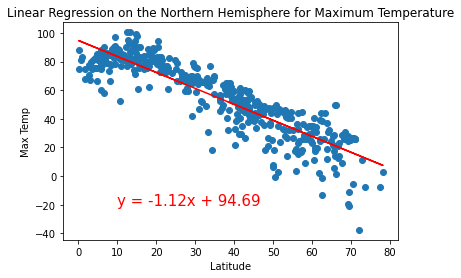

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-20))

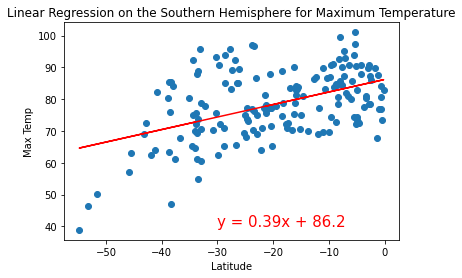

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-30,40))

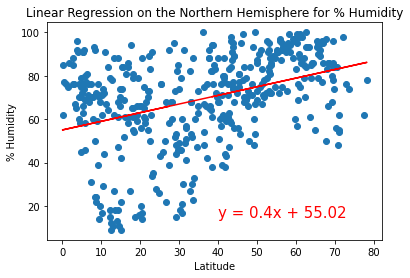

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,15))

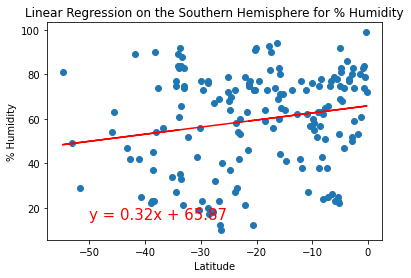

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

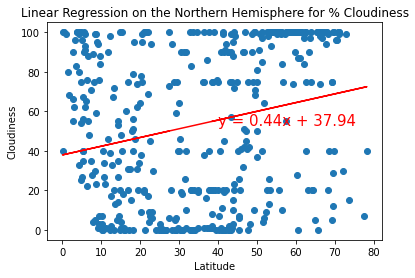

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness',(40,53))

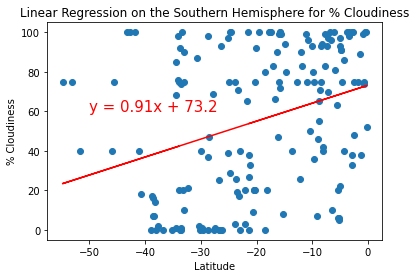

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

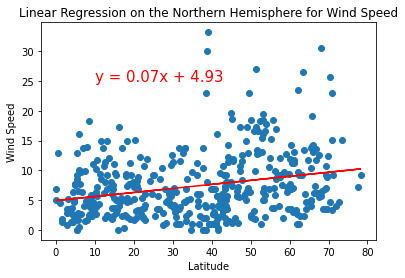

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,25))

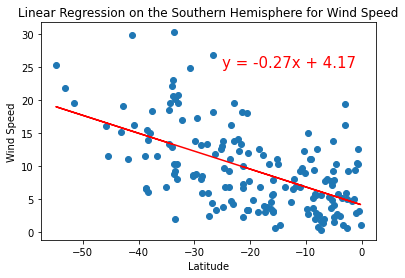

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-25,25))